In [111]:
# Importing necessary libraries for data manipulation and analysis
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import os


#  Load and Inspect Data

In [112]:
# Load the dataset with a simpler variable name
df = pd.read_csv("twitter_human_bots_dataset.csv", index_col=0)

# Display the shape and columns of the dataset
print(f"Dataset shape {df.shape}")  
print(f"Dataset columns: {df.columns}")

# Show the first few rows of the dataset
df.head()


Dataset shape (37438, 19)
Dataset columns: Index(['created_at', 'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'id', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'statuses_count', 'verified',
       'average_tweets_per_day', 'account_age_days', 'account_type'],
      dtype='object')


,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,False,False,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,False,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,False,7.870,1403,bot
1,2016-11-09 05:01:30,False,False,Photographing the American West since 1980. I ...,536,860,880,False,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,False,0.183,1379,human
2,2017-06-17 05:34:27,False,False,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,True,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,False,0.864,1159,human
3,2016-07-21 13:32:25,True,False,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,True,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,False,0.889,1489,human
4,2012-01-15 16:32:35,False,False,Loan coach at @mancity & Aspiring DJ,88,753678,116,True,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,True,1.339,3138,human


**Data Preprocessing Functions**

In [113]:
# Function to convert boolean columns to integers
def convert_bool_to_int(data, cols):
    try:
        for col in cols:
            data[col] = data[col].astype(int)
    except Exception as e:
        print(e)
    return data

# Function to compute a custom popularity metric
def popularity_metric(friends, followers):
    return np.round(np.log(1+friends) * np.log(1+followers), 3)


**Apply Data Preprocessing**

In [114]:
# Define columns that need to be converted
bool_cols = ["default_profile", "default_profile_image", "geo_enabled", "verified"]

# Apply the function to convert boolean columns
df = convert_bool_to_int(df, bool_cols)

# Show the first few rows after conversion
df.head()


,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type
0,2016-10-15 21:32:11,0,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,0,7.870,1403,bot
1,2016-11-09 05:01:30,0,0,Photographing the American West since 1980. I ...,536,860,880,0,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,0,0.183,1379,human
2,2017-06-17 05:34:27,0,0,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,1,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,0,0.864,1159,human
3,2016-07-21 13:32:25,1,0,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,1,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,0,0.889,1489,human
4,2012-01-15 16:32:35,0,0,Loan coach at @mancity & Aspiring DJ,88,753678,116,1,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,1,1.339,3138,human


In [115]:
print(f"Dataset columns: {df.columns}")


Dataset columns: Index(['created_at', 'default_profile', 'default_profile_image', 'description',
       'favourites_count', 'followers_count', 'friends_count', 'geo_enabled',
       'id', 'lang', 'location', 'profile_background_image_url',
       'profile_image_url', 'screen_name', 'statuses_count', 'verified',
       'average_tweets_per_day', 'account_age_days', 'account_type'],
      dtype='object')


**Create Popularity Metric**

In [116]:
# Function to calculate the popularity metric for each row
def compute_popularity(row):
    return popularity_metric(row["friends_count"], row["followers_count"])

# Add the popularity column to the DataFrame
df["popularity"] = df.apply(compute_popularity, axis=1)

# Show the popularity column
df[['popularity']]

,popularity
0,11.864
1,45.827
2,32.922
3,40.325
4,64.445
...,...
37433,34.634
37434,89.249
37435,59.654
37436,25.255


# EDA

**Setting up Plot Styles**

In [117]:
# Set up the plotting style for better visuals
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['figure.figsize'] = 12, 8
mpl.rcParams['font.sans-serif'] = ['Tahoma']
sns.set(font_scale=1.5)
sns.set_style("whitegrid")  # Set up some parameters for EDA

**Define Helper Functions for Plotting and Data Labeling**

In [118]:
# Function to get labels and corresponding colors from a dataframe column
def get_labels_colors_from_pandas_column(df: pd.DataFrame, column: str, palette: str):
    data_labels = dict()
    try:
        labels = df[column].unique().tolist()
        colors = sns.color_palette(palette, len(labels))
        data_labels = dict(zip(labels, colors))
    except Exception as e:
        print(e)
    return data_labels

# Function to plot multiple histograms based on a column and target variable
def plot_multiple_histograms(data: pd.DataFrame, grouped_col: str, target_col: str, data_labels: dict):
    plt.figure(figsize=(12, 10))
    title = "\n"
    labels = list(data_labels.keys())
    for j, i in enumerate(labels):
        x = data.loc[data[grouped_col] == i, target_col]
        mu_x = round(float(np.mean(x)), 3)
        sigma_x = round(float(np.std(x)), 3)
        ax = sns.distplot(x, color=data_labels.get(i), label=i, hist_kws=dict(alpha=.1),
                          kde_kws={'linewidth': 2})
        ax.axvline(mu_x, color=data_labels.get(i), linestyle='--')
        ax.set(xlabel=f"{target_col.title()}", ylabel='Density')
        title += f"Parameters {str(i)}: $G(\mu=$ {mu_x}, $\sigma=$ {sigma_x} \n"
        ax.set_title(title)
    plt.legend(title="Account Type")
    plt.grid()
    plt.tight_layout()
    plt.show()

# Function to plot multiple boxplots based on a column and target variable
def plot_multiple_boxplots(data: pd.DataFrame, grouped_col: str, target_col: str, palette: str = "husl"):
    plt.figure(figsize=(12, 10))
    means = data.groupby([grouped_col])[target_col].mean().to_dict()
    counter = 0

    bp = sns.boxplot(x=grouped_col, y=target_col, data=data, palette=palette, order=list(means.keys()))
    bp.set(xlabel='', ylabel=f"{target_col.title()}")
    ax = bp.axes

    for k, v in means.items():
        mean = round(v, 2)
        ax.text(
            counter,
            mean,
            f'{mean}',
            ha='center',
            va='center',
            fontweight='bold',
            size=10,
            color='white',
            bbox=dict(facecolor='#445A64'))
        counter += 1
    bp.figure.tight_layout()
    plt.grid()
    plt.show()


**Set Variables for Grouping and Plotting**

In [119]:

# Define parameters for grouping and plotting
palette = "husl"
grouped = "account_type"
default_value = "unknown"

# Retrieve labels and colors based on the grouped column
data_labels = get_labels_colors_from_pandas_column(df=twitter_accounts_df, column=grouped, palette=palette)

# Show unique target values for verification
print(f"Unique Target values: {data_labels.keys()}")    


Unique Target values: dict_keys(['Bot', 'Human'])


**Plot Histograms for Popularity**

C:\Users\nopi\AppData\Local\Temp\ipykernel_14624\358238456.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, color=data_labels.get(i), label=i, hist_kws=dict(alpha=.1),
C:\Users\nopi\AppData\Local\Temp\ipykernel_14624\358238456.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot

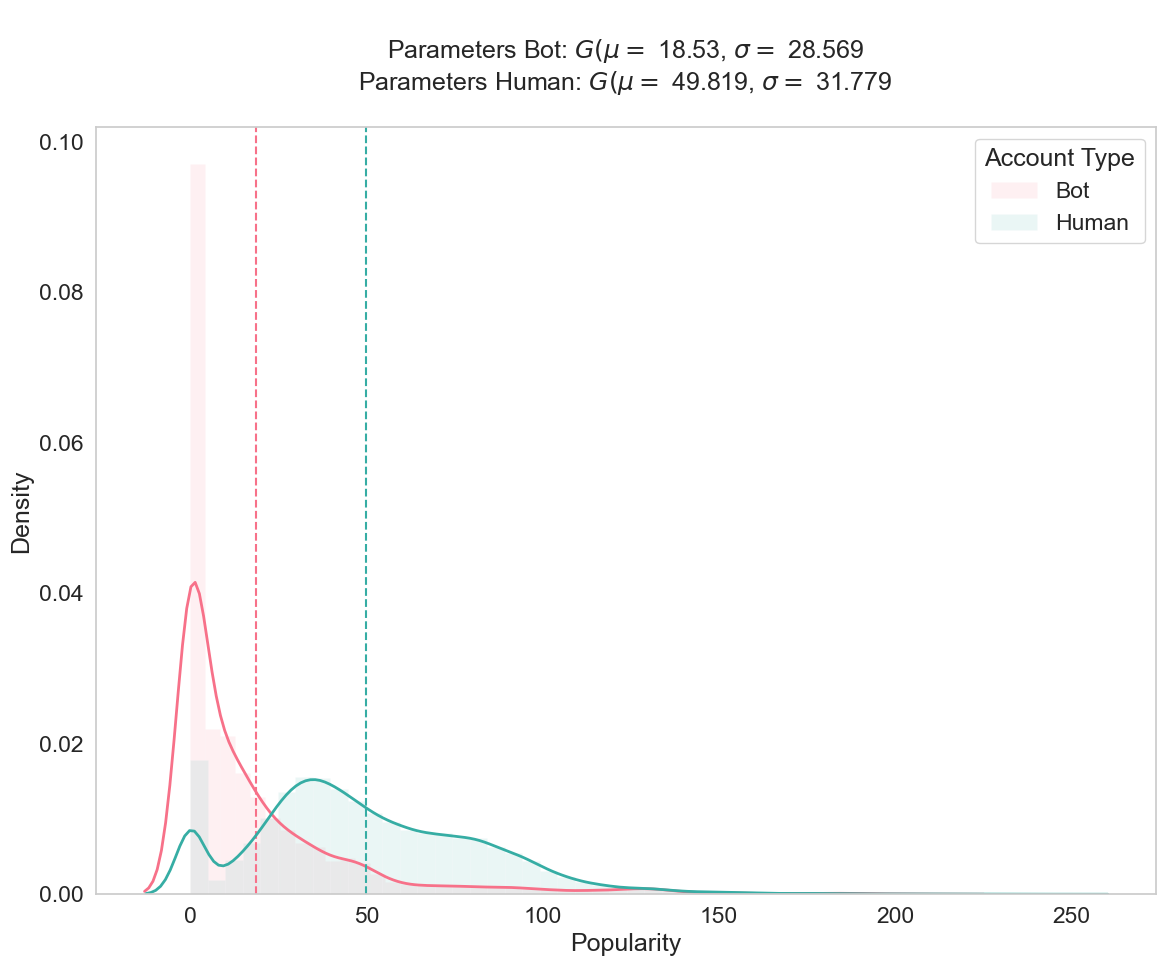

In [120]:
# Set the target column for analysis
target = "popularity"

# Plot histograms for different account types
plot_multiple_histograms(data=twitter_accounts_df, grouped_col=grouped, data_labels=data_labels, target_col=target)


**Plot Boxplots for Popularity**

C:\Users\nopi\AppData\Local\Temp\ipykernel_14624\358238456.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x=grouped_col, y=target_col, data=data, palette=palette, order=list(means.keys()))


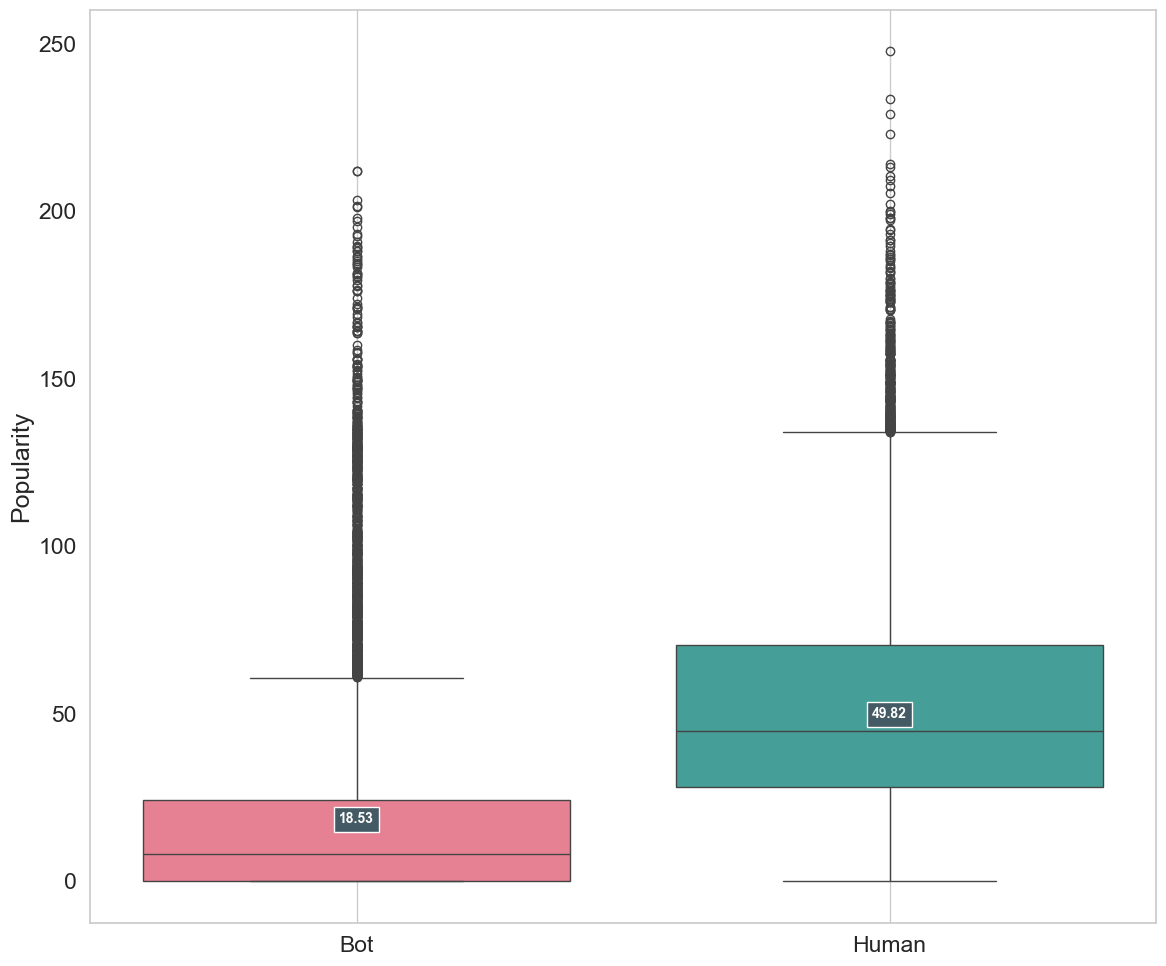

In [121]:
# Plot boxplots for different account types
plot_multiple_boxplots(data=twitter_accounts_df, grouped_col=grouped, target_col=target, palette=palette)


**Plot Histograms for Average Tweets Per Day**

C:\Users\nopi\AppData\Local\Temp\ipykernel_14624\358238456.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, color=data_labels.get(i), label=i, hist_kws=dict(alpha=.1),
C:\Users\nopi\AppData\Local\Temp\ipykernel_14624\358238456.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot

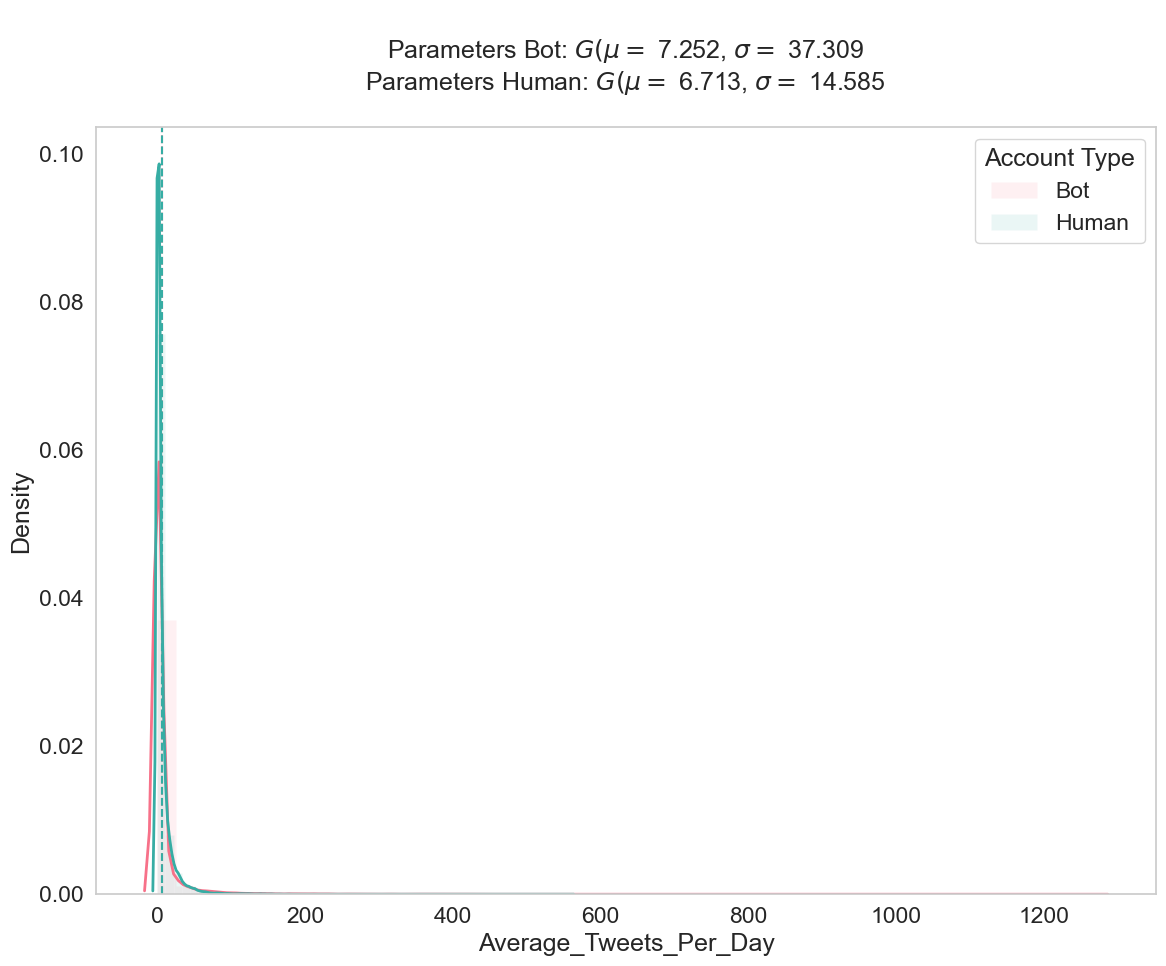

In [122]:
# Set the target column for average tweets per day
target = "average_tweets_per_day"

# Plot histograms for different account types
plot_multiple_histograms(data=twitter_accounts_df, grouped_col=grouped, data_labels=data_labels, target_col=target)


**Plot Boxplots for Average Tweets Per Day**

C:\Users\nopi\AppData\Local\Temp\ipykernel_14624\358238456.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x=grouped_col, y=target_col, data=data, palette=palette, order=list(means.keys()))


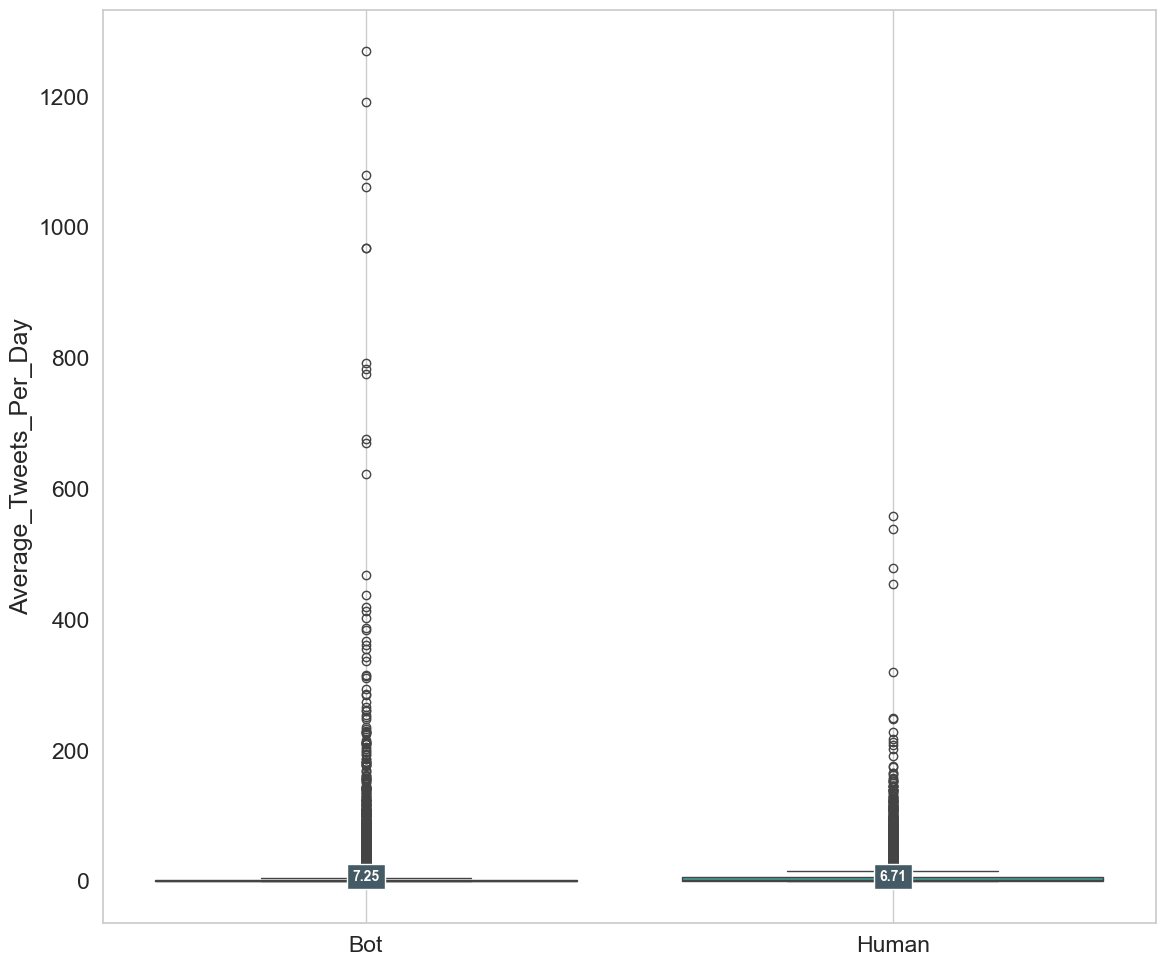

In [123]:
# Plot boxplots for different account types
plot_multiple_boxplots(data=twitter_accounts_df, grouped_col=grouped, target_col=target, palette=palette)


**Plot Stacked Bar Plot for Verified Accounts**

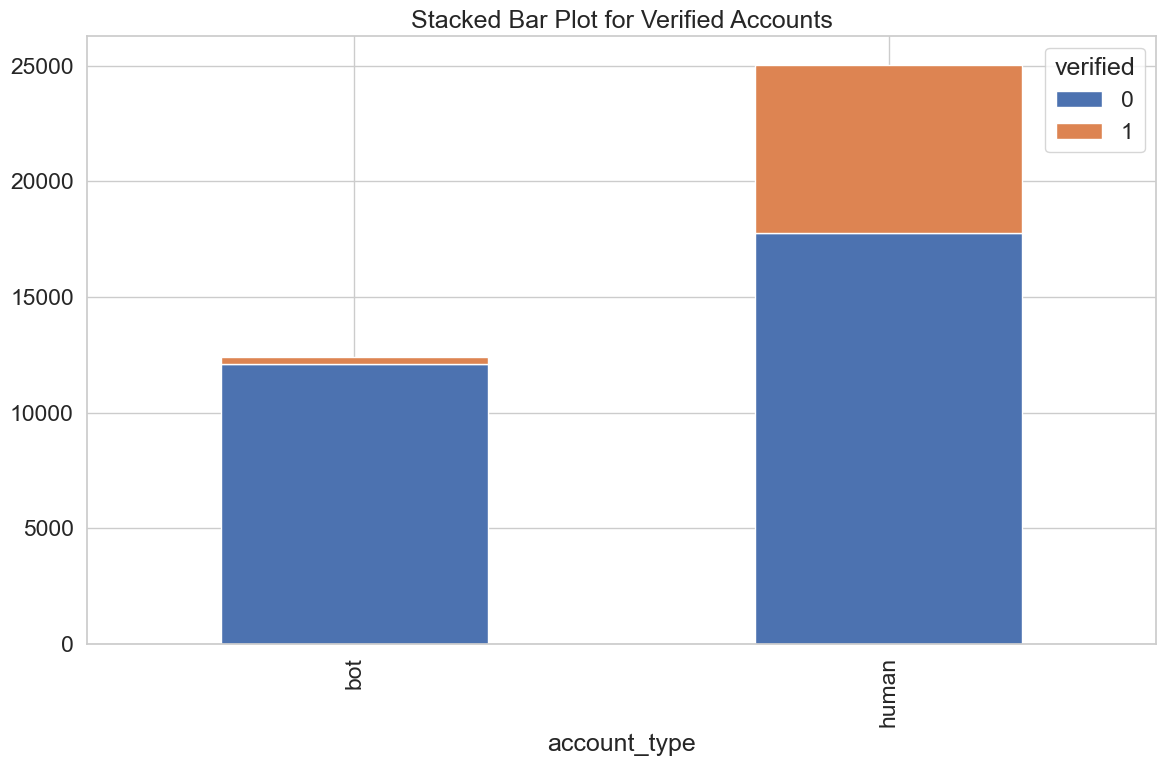

In [124]:
# Group data by account type and 'verified' status
target_col = "verified"
df2 = df.groupby([grouped, target_col])[grouped].count().unstack(target_col)

# Plot the stacked bar plot
df2.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Plot for Verified Accounts')
plt.tight_layout()
plt.show()


**Plot Histograms for Status Count**

C:\Users\nopi\AppData\Local\Temp\ipykernel_14624\358238456.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x, color=data_labels.get(i), label=i, hist_kws=dict(alpha=.1),
C:\Users\nopi\AppData\Local\Temp\ipykernel_14624\358238456.py:21: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot

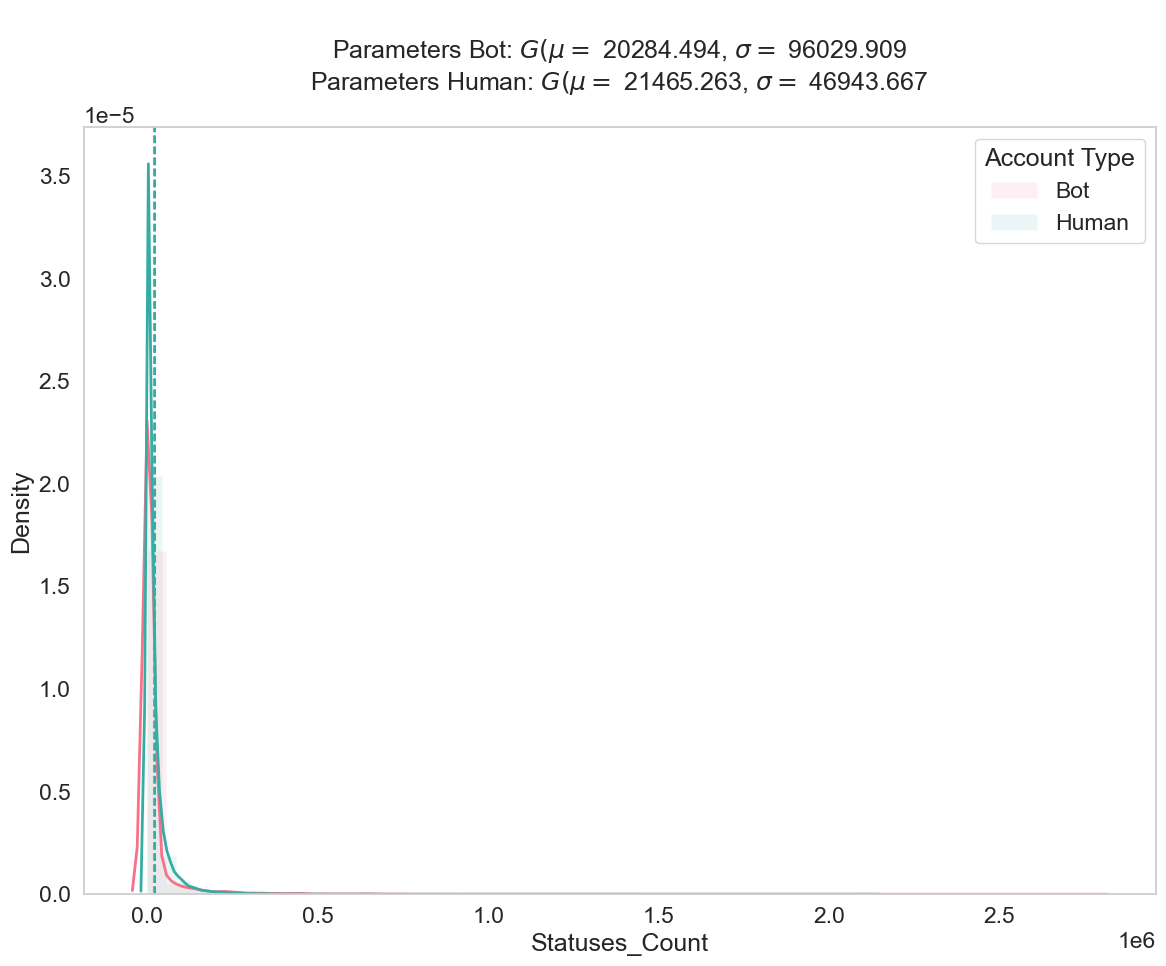

In [125]:
# Set the target column for status count
target = "statuses_count"

# Plot histograms for different account types
plot_multiple_histograms(data=twitter_accounts_df, grouped_col=grouped, data_labels=data_labels, target_col=target)


**Plot Boxplots for Status Count**

C:\Users\nopi\AppData\Local\Temp\ipykernel_14624\358238456.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bp = sns.boxplot(x=grouped_col, y=target_col, data=data, palette=palette, order=list(means.keys()))


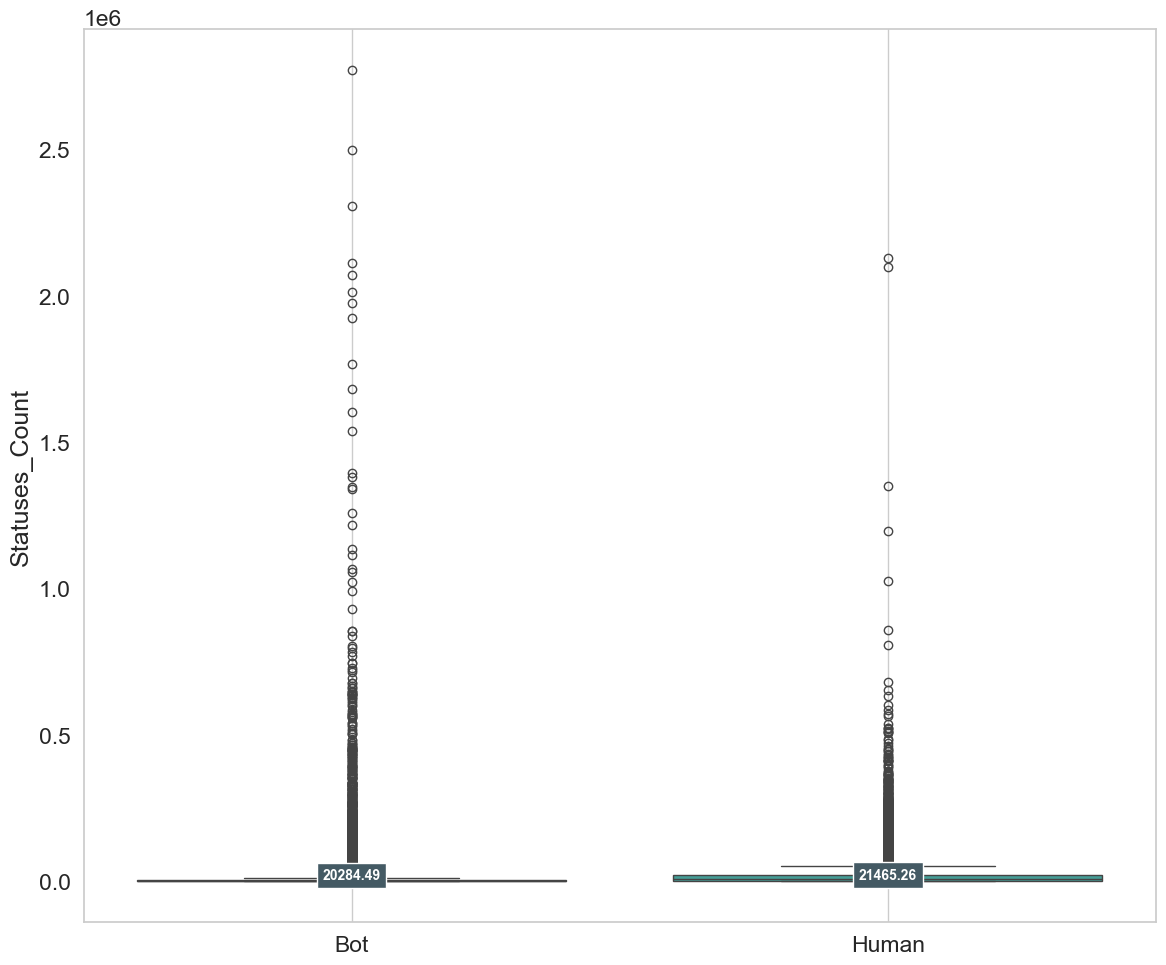

In [126]:
# Plot boxplots for different account types
plot_multiple_boxplots(data=twitter_accounts_df, grouped_col=grouped, target_col=target, palette=palette)


**Preprocess the account_type column (Convert to Categorical Codes)**

In [127]:
# Preprocess Response variable (account type)
df[grouped] = df[grouped].astype('category')
print(df.dtypes)

# Convert 'account_type' to category codes
df[grouped] = df[grouped].cat.codes
df.head()


created_at                        object
default_profile                    int32
default_profile_image              int32
description                       object
favourites_count                   int64
followers_count                    int64
friends_count                      int64
geo_enabled                        int32
id                                 int64
lang                              object
location                          object
profile_background_image_url      object
profile_image_url                 object
screen_name                       object
statuses_count                     int64
verified                           int32
average_tweets_per_day           float64
account_age_days                   int64
account_type                    category
popularity                       float64
dtype: object


,created_at,default_profile,default_profile_image,description,favourites_count,followers_count,friends_count,geo_enabled,id,lang,location,profile_background_image_url,profile_image_url,screen_name,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,popularity
0,2016-10-15 21:32:11,0,0,"Blame @xaiax, Inspired by @MakingInvisible, us...",4,1589,4,0,787405734442958848,en,unknown,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/7874121826...,best_in_dumbest,11041,0,7.870,1403,0,11.864
1,2016-11-09 05:01:30,0,0,Photographing the American West since 1980. I ...,536,860,880,0,796216118331310080,en,Estados Unidos,http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/8023296328...,CJRubinPhoto,252,0,0.183,1379,1,45.827
2,2017-06-17 05:34:27,0,0,Scruffy looking nerf herder and @twitch broadc...,3307,172,594,1,875949740503859204,en,"Los Angeles, CA",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/1278890453...,SVGEGENT,1001,0,0.864,1159,1,32.922
3,2016-07-21 13:32:25,1,0,Wife.Godmother.Friend.Feline Fanatic! Assistan...,8433,517,633,1,756119643622735875,en,"Birmingham, AL",NaN,http://pbs.twimg.com/profile_images/1284884924...,TinkerVHELPK5,1324,0,0.889,1489,1,40.325
4,2012-01-15 16:32:35,0,0,Loan coach at @mancity & Aspiring DJ,88,753678,116,1,464781334,en,"England, United Kingdom",http://abs.twimg.com/images/themes/theme1/bg.png,http://pbs.twimg.com/profile_images/9952566258...,JoleonLescott,4202,1,1.339,3138,1,64.445


**Extract Numeric Data**

In [128]:
# Create a copy and keep only numeric data for modeling
df_num = df.copy()
df_num = df_num._get_numeric_data()
df_num.head()


,default_profile,default_profile_image,favourites_count,followers_count,friends_count,geo_enabled,id,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,popularity
0,0,0,4,1589,4,0,787405734442958848,11041,0,7.870,1403,0,11.864
1,0,0,536,860,880,0,796216118331310080,252,0,0.183,1379,1,45.827
2,0,0,3307,172,594,1,875949740503859204,1001,0,0.864,1159,1,32.922
3,1,0,8433,517,633,1,756119643622735875,1324,0,0.889,1489,1,40.325
4,0,0,88,753678,116,1,464781334,4202,1,1.339,3138,1,64.445


**Drop Unnecessary Columns (e.g., "id")**

In [129]:
# Remove unnecessary columns
drop_cols = ["id"]
df_num.drop(drop_cols, axis=1, inplace=True)
df_num.head()


,default_profile,default_profile_image,favourites_count,followers_count,friends_count,geo_enabled,statuses_count,verified,average_tweets_per_day,account_age_days,account_type,popularity
0,0,0,4,1589,4,0,11041,0,7.870,1403,0,11.864
1,0,0,536,860,880,0,252,0,0.183,1379,1,45.827
2,0,0,3307,172,594,1,1001,0,0.864,1159,1,32.922
3,1,0,8433,517,633,1,1324,0,0.889,1489,1,40.325
4,0,0,88,753678,116,1,4202,1,1.339,3138,1,64.445


**Compute Correlation Among Features**

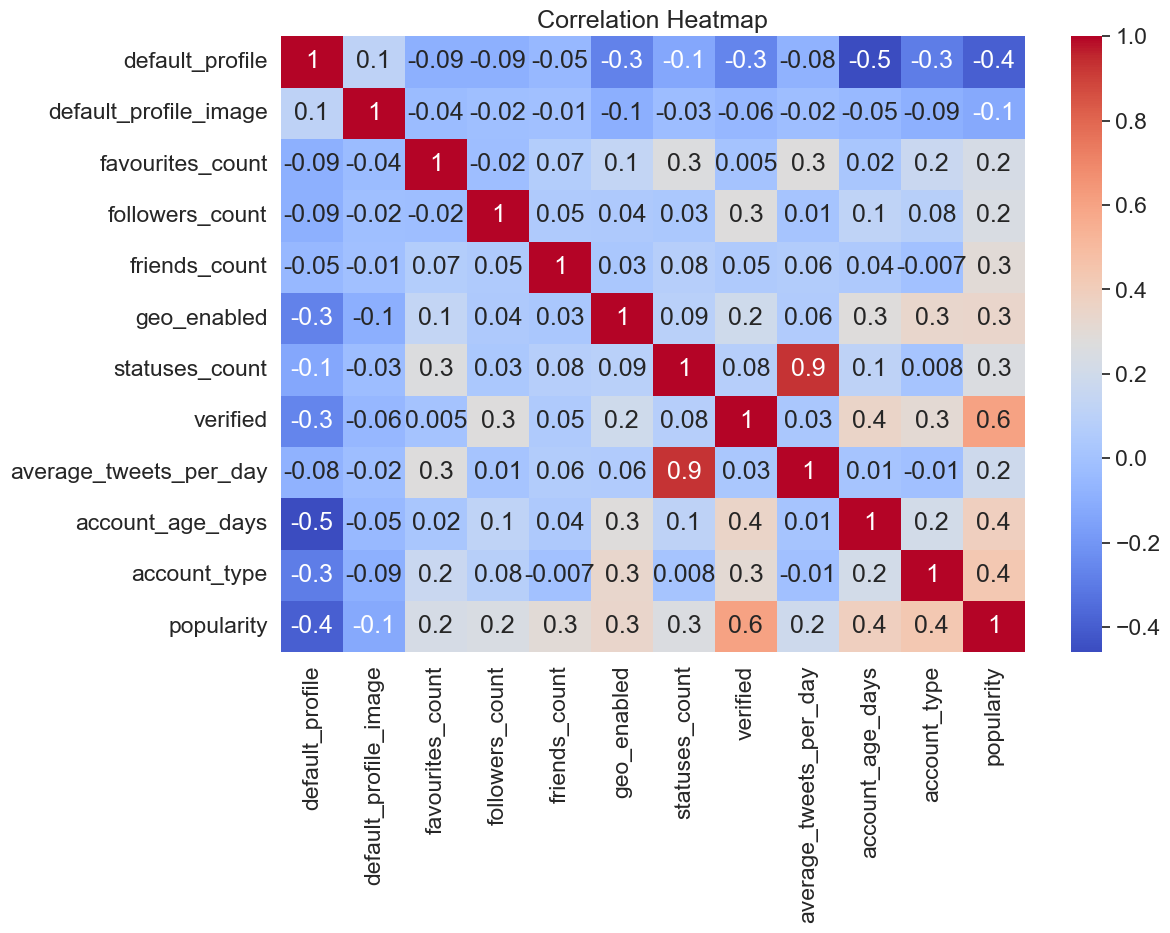

In [130]:
# Compute correlation among the features and the response variable
corr = df_num.corr()

# Plot the correlation heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            annot=True, fmt='.1g', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**Split Data into Features (X) and Target (y)**

In [131]:
# Split the data into features (X) and target (y)
X = df_num.drop(columns=["account_type"])  # Features
y = df_num["account_type"]  # Target variable (account_type)

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train Random Forest Model**

In [132]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

**Feature Importance Visualization**

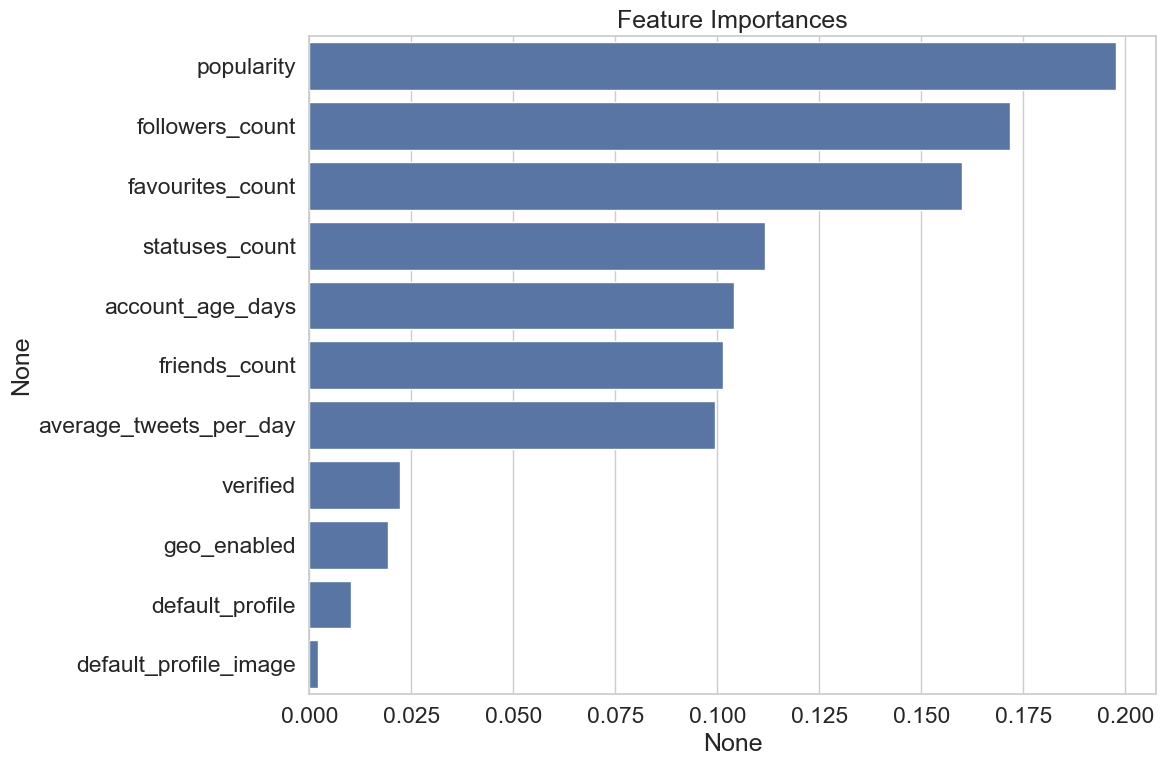

In [133]:
# Get feature importances from the trained model
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances = feature_importances.sort_values(ascending=False)

# Plot the feature importances
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importances")
plt.tight_layout()
plt.show()


**Make Predictions and Evaluate Model**

In [134]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8737980769230769
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      2487
           1       0.88      0.93      0.91      5001

    accuracy                           0.87      7488
   macro avg       0.87      0.84      0.85      7488
weighted avg       0.87      0.87      0.87      7488

